In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/imdb-reviews-pt-br.csv')

In [6]:
data['classificacao'] = data.sentiment.replace({'neg': 0, 'pos': 1})

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    """texto: dataset
    coluna_texto: coluna com os valores para vetorizar
    coluna_classificacao: coluna com os valores de classificação
    """
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino_x, treino_y)
    return regressao_logistica.score(teste_x, teste_y)

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

In [8]:
from wordcloud import WordCloud

In [9]:
def nuvem_de_palavras(texto, coluna, query):
    palavras_sep = texto.query(query)
    
    todas_palavras = ' '.join([textos for textos in palavras_sep[coluna]])

    nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations = False).generate(todas_palavras)

    plt.figure(figsize=(14,10))
    plt.imshow(nuvem_de_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [10]:
from nltk import tokenize

In [11]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_spaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()


In [14]:
from nltk import tokenize

frase = "olá Mundo!"

tokenizar = tokenize.WordPunctTokenizer()

frase_tokenizada = tokenizar.tokenize(frase)

print(frase_tokenizada)

['olá', 'Mundo', '!']


In [24]:
import nltk

todas_palavras = ' '.join([textos for textos in data.text_pt])

token_spaco = tokenize.WhitespaceTokenizer()
token_frase = token_spaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [25]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in data.text_pt:
    nova_frase = list()
    palavras_texto = token_spaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

data["tratamento_1"] = frase_processada

In [26]:
data.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [52]:
from string import punctuation
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [28]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [30]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in data["tratamento_1"]:
    nova_frase = list()
    palavras_texto = tokenizar.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

In [31]:
data["tratamento_2"] = frase_processada

In [32]:
data

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


In [33]:
data['tratamento_2'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

In [34]:
data['tratamento_1'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [36]:
!pip install Unidecode

In [37]:
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [38]:
sem_acentos = [unidecode.unidecode(texto) for texto in data["tratamento_2"]]

In [39]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [41]:
data["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in data["tratamento_3"]:
    nova_frase = list()
    palavras_texto = tokenizar.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

data["tratamento_3"] = frase_processada

In [44]:
acuracia_tratamento3 = classificar_texto(data, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6810351799433886


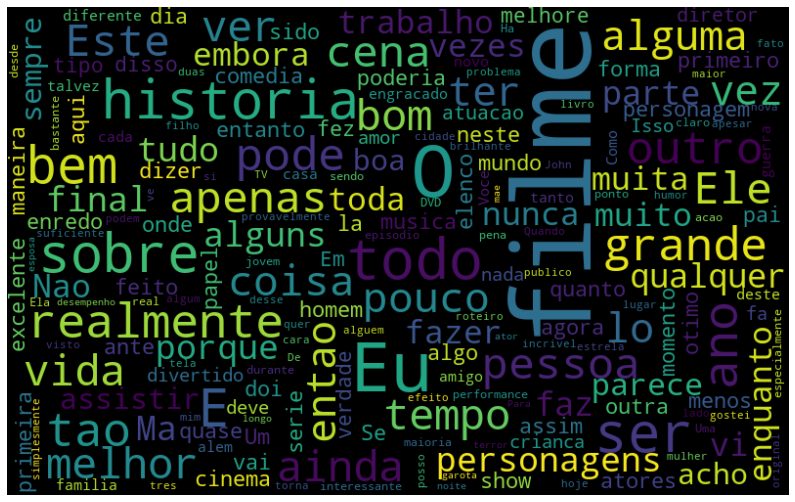

In [47]:
nuvem_de_palavras(data, 'tratamento_3', "sentiment == 'pos'")

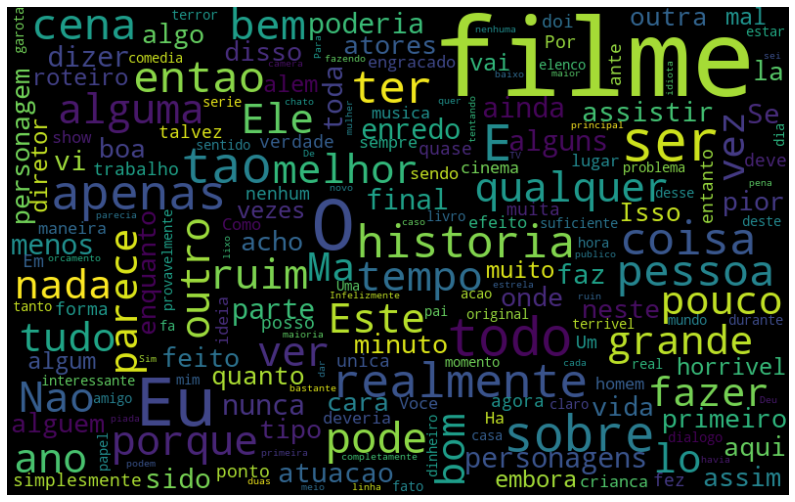

In [49]:
nuvem_de_palavras(data, 'tratamento_3', "classificacao == 0")

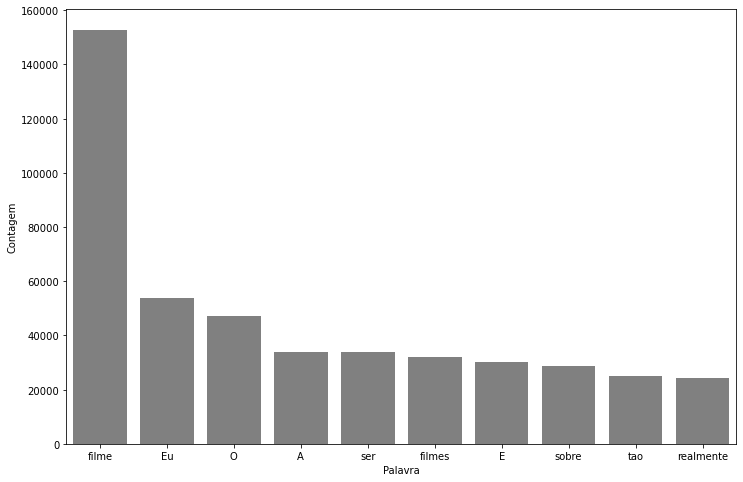

In [53]:
pareto(data, "tratamento_3", 10)

In [54]:
frase = "O Thiago é o novo instrutor da Alura"
print(frase.lower())

o thiago é o novo instrutor da alura


In [55]:
frase_processada = list()
for opiniao in data["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = tokenizar.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

data["tratamento_4"] = frase_processada

In [65]:
acuracia_tratamento4 = classificar_texto(data, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.6879094217549535
0.6810351799433886


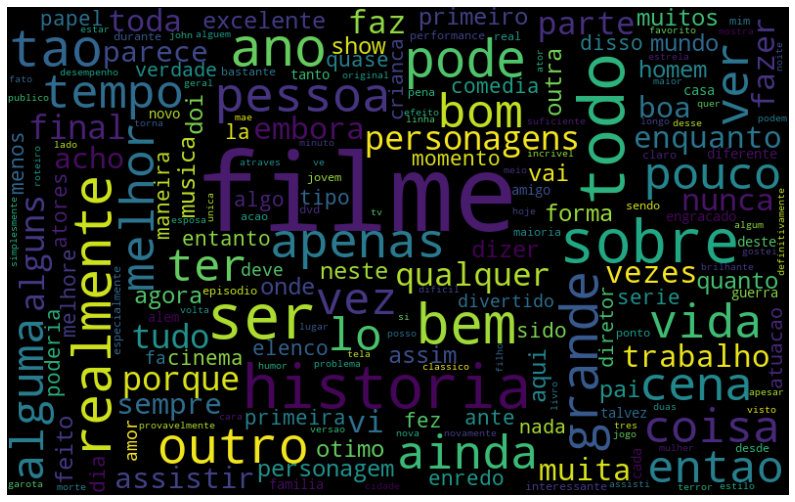

In [57]:
nuvem_de_palavras(data, 'tratamento_4', "classificacao == 1")

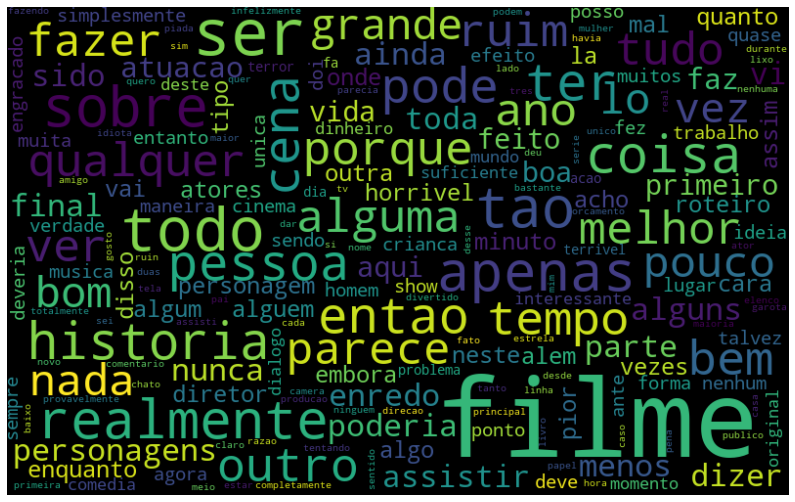

In [58]:
nuvem_de_palavras(data, 'tratamento_4', "classificacao == 0")

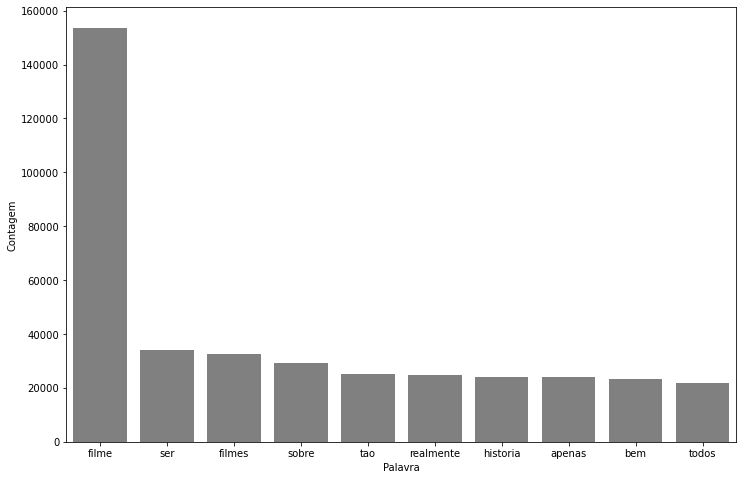

In [60]:
pareto(data, "tratamento_4", 10)

In [61]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

In [62]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("correria")

'corr'

In [63]:
frase_processada = list()
for opiniao in data["tratamento_4"]:
    nova_frase = list()
    palavras_texto = tokenizar.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

data["tratamento_5"] = frase_processada

In [66]:
acuracia_tratamento5 = classificar_texto(data, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6943792964011323
0.6879094217549535


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names()

)

C:\Users\Rado\anaconda3\envs\estudos\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [72]:
regressao_logistica = LogisticRegression(solver = "lbfgs")

In [73]:
tfidf_bruto = tfidf.fit_transform(data["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, data["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [74]:
tfidf_tratados = tfidf.fit_transform(data["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, data["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6988273352203801


In [76]:
from nltk import ngrams

frase: "Assisti um ótimo filme."
frase_separada = token_spaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('O', 'Thiago'),
 ('Thiago', 'é'),
 ('é', 'o'),
 ('o', 'novo'),
 ('novo', 'instrutor'),
 ('instrutor', 'da'),
 ('da', 'Alura')]

In [77]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(data["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, data["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [78]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(data["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, data["classificacao"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf)

0.8841892438334007


In [79]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)
pesos.nlargest(10, 0)

C:\Users\Rado\anaconda3\envs\estudos\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
otim,8.294689
excel,7.979160
perfeit,6.579045
favorit,5.779033
maravilh,5.286603
incri,5.050597
hilari,4.657416
divert,4.582881
ador,4.423208
brilh,4.268658


In [80]:
pesos.nsmallest(10,0)

,0
pi,-9.177781
ruim,-9.171308
horri,-8.753395
terri,-7.187641
chat,-6.919266
nad,-6.031704
infeliz,-5.309755
decepca,-4.998346
ridicul,-4.952569
nenhum,-4.920672
